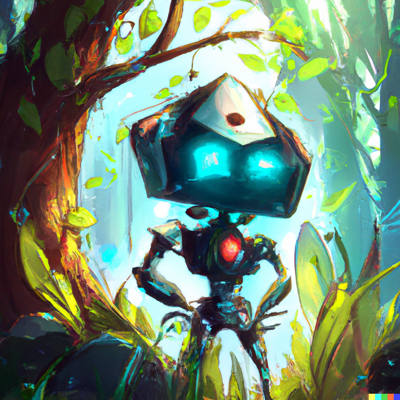

'Solar punk forest guardian source: DALLE·2'

In [4]:
from PIL import Image

smol_forest_guardian = Image.open(
    "./DALL·E-digital_art_cute_solarpunk_forest_guardian_robot.png"
)
display(
    smol_forest_guardian.resize((400, 400)),
    "Solar punk forest guardian source: DALLE·2",
)

This charming little forest robot was created using [OpenAI's DALL·E 2 model](https://labs.openai.com/), based on my prompt: "Digital art cute solarpunk forest guardian robot".

This image represents an idea I've been interested in for a long time. I'm not certain where it all started, but I think it goes back to my childhood. That's when my aunt introduced me to my first Miyazaki movies: 'My Neighbor Totoro', 'Spirited Away', and 'Castle in the Sky'.

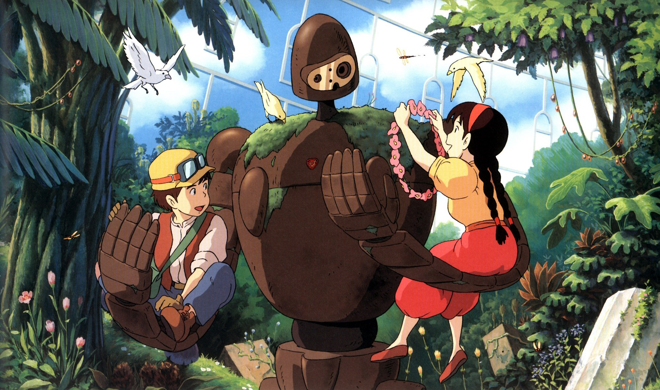

'Castle in the Sky Guardian source: https://characterdesignreferences.com/art-of-animation-9/art-of-castle-in-the-sky'

In [5]:
big_guardian = Image.open("./castle_in_sky_guardian.jpg")
ratio = 0.33
new_dimens = (round(big_guardian.width * ratio), round(big_guardian.height * ratio))
display(
    big_guardian.resize(new_dimens),
    "Castle in the Sky Guardian source: https://characterdesignreferences.com/art-of-animation-9/art-of-castle-in-the-sky",
)

Most Hayao Miyazaki fans, I believe, can relate to the sense of awe they feel when watching his films. He has a unique ability to instill a profound respect for nature, capturing its simple beauty and serving as a daily reminder of how much we often take it for granted. His films advocate for the protection of nature from human exploitation and emphasize the importance of reconnecting with the world around us. The Laputian robot from 'Castle in the Sky', depicted above, stands as a compelling example of this message.

<details>
    <summary><b>🙉❗ Spoiler alert: Click here if you're okay with that</b></summary><br>
This robot, initially introduced as a deadly weapon designed to protect the royal family of Laputa (the castle in the sky), demonstrates overwhelming destructive power at various points throughout the film.<br>
However, a contrasting image is portrayed within the Castle itself, where we see the same model of robot tending gardens, befriending animals, and existing harmoniously with nature.<br>
This stark dichotomy serves as a potent caution for the evolution of technologies, such as Artificial Intelligence (AI).<br>
The choice is ours: Will we opt for peace or plunge into chaos?<br>
</details>
<br>

A few years ago, perhaps inspired by Miyazaki's works, I realized my mission: to develop technology that champions the rights of non-human animals and safeguards our shared ecosystems. I envision a future where AI not only respects nature more deeply than humans currently do, but also unravels its secrets that remain undiscovered.

To take steps towards this goal, I am embarking on a journey to learn about deep learning, one of the most promising fields within AI. This blog will serve as a record of my progress, where I'll document my practice and share related ideas, lessons, and questions that arise along the way. 


## [fast.ai](https://www.fast.ai/)
Fastai is a vibrant community of deep learning enthusiasts, dedicated to making AI accessible to all. I'm currently going through their 'Practical Deep Learning for Coders' course, which has been fantastic thus far!

I'd highly recommend this course to anyone with even a hint of programming experience who's curious about AI. This is particularly true if you're in an industry where AI development is still in its infancy - there could be a significant opportunity waiting.

### Surprising Discoveries (so far)
I was astounded by the speed at which I could train and deploy my first model - all within a few weeks of learning.

**Transfer learning** is a technique that involves taking a pre-trained model with expert-determined weights and fine-tuning it with your specific data. 

This strategy allows you to quickly implement a functioning model, without the need to start from scratch each time. As an example, I trained a simple greenhouse/hydroponic plant health classifier using a pre-trained image classifier model based on the ResNet18 architecture. This was a problem a previous company I worked at was trying to solve, so I thought it would be a fun challenge to undertake myself. 

My trained model is now deployed on this [🤗 Hugging Face space](https://huggingface.co/spaces/evylz/plant-doc). 

Here's a fun fact 🤓: A GPU isn't necessarily required for a deployed model. 

![Screenshot of the plant-doc 🤗 space](./plant-doc-hface.png)

Below are some snippets from the training of the model, conducted [in a Google Colab notebook](https://colab.research.google.com/drive/1k_02v2nxo4Y9ZaKIOm2FeJfvK6AQaLM5?usp=sharing). 

In [ ]:
#| code-fold: false
from fastai.vision.all import *
from fastai.vision.widgets import *

# ... create a labeled image datablock and visualize

hydro_dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),
)
dls = hydro_dblock.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2, figsize=(8, 5))

![Labeled datablock](./hydro-dblock.png)

In [ ]:
#| code-fold: false
# ... use a pretrained learner and fine tune
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

![Epoch table](./epoch-table-plant-doc.png)

### Overcoming Initial Fears in Deep Learning

Before diving into the world of deep learning, I was somewhat daunted by the complexity I feared training and deploying a model would entail. I'm neither a math whiz nor a master coder, but I found many of the initial concepts far more intuitive than I'd anticipated.

For instance, the practice of maintaining a **separate training set of data from a validation set** (and a test set) seemed quite logical. The training set provides the model with a foundational understanding of correct answers, like labeled images. The validation set then serves as a quiz for your model, checking its comprehension of the patterns it has learned. In the context of an image classifier, the model must guess which label best matches a given image from the validation set, and then evaluate the confidence level of its correctness or error. This process facilitates the model's improvement with each "epoch" or training cycle. Additionally, a completely separate test set, kept hidden from the model, can be used by humans to assess the model's performance after training is completed.

![Simplified model training through test diagram](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/61568656a13218cdde7f6166_training-data-validation-test.png)

Separating a robust validation set (and test set) helps to prevent overfitting the model to images present only in the training set. Overfitting can render models unreliable for new images encountered outside the "lab" setting.

For instance, if you're building a cat breed classifier and include numerous images of the same orange cat perched on its cat tower in both the test and validation sets, the model might overfit for that particular scenario.

Another concept I found intuitive and valuable is the confusion matrix. The confusion matrix helps us visualize which labels the model was "confused" by and predicted incorrectly during training. For example, as shown below, the model predicted that a few plants were healthy when they were actually wilted, and vice versa.

In [ ]:
#| code-fold: false
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

![Confusion matrix](./confusion_matrix.png)

We can also plot the top mistakes to visualize the images where the model made incorrect predictions and evaluate the model's confidence in its decisions. Being confidently wrong is problematic, but so is being correct with low confidence. Both scenarios suggest areas where the model can improve.

In the first case, the model may have 'learned' incorrect patterns from the training data, leading to high confidence in wrong predictions. In the second case, the model's lack of confidence, even when correct, could suggest that it's struggling to find clear patterns in the data. These are valuable insights that can guide us in improving the model's performance.

In [ ]:
#| code-fold: false
interp.plot_top_losses(5)

![Plot of top losses](./top_losses_plot.png)

### Opportunities for Deep Learning in the Animal and Vegan Advocacy Movement

The Animal and Vegan Advocacy (AVA) movement has a multitude of opportunities to leverage deep learning. Just to name a few:

- Monitoring wildlife habitats
- Identifying illegal deforestation
- Flagging illegal fishing vessels
- Building vegan education chatbots
- Enforcing farmed animal welfare standards

Some of these areas are already seeing progress. For example, check out this [AI4Animals animal welfare issue camera monitoring system developed in the Netherlands](https://www2.deloitte.com/nl/nl/pages/consumer/solutions/ai4animals.html). 

One of the most intriguing projects I've come across in this field is the [Earth Species Project](https://www.earthspecies.org/). Their goal is to decode non-human communication using Natural Language Processing. The potential to understand the 'secret languages' animals use could undoubtedly foster more compassion.

### Obstacles Faced by the Movement

Non-profit organizations, particularly those advocating for animal rights, often face resource constraints that aren't an issue for for-profit industries. Even within the landscape of animal non-profits, farmed animal activism [receives only a fraction of the donations that shelters do](https://animalcharityevaluators.org/donation-advice/why-farmed-animals/).

![Chart of animals impacted and donations received for animal charities](https://animalcharityevaluators.org/wp-content/uploads/2013/12/donation-allocation-chart-fullsize-409x264@2x.jpg)

Moreover, non-profits frequently lag behind in technology adoption, making it challenging not only to attract talent like Machine Learning engineers, but also to pursue deep learning-enabled projects that have the potential to make a significant impact. 

Large animal agriculture enterprises, armed with extensive resources, are using AI to enhance their efficiency, often without considering animal welfare or ecosystem health. Historically, technology has been used to exploit our environment, damaging natural habitats and harming wildlife. If left unchecked, AI could further this trend.

We need to empower compassionate individuals and policymakers to better understand AI. This will ensure its use strikes a healthier balance between technological advancement and nature, rather than exacerbating existing problems.

Thank you for reading, and stay tuned for more posts in the future!

This blog was built with [Quarto](https://quarto.org/) and [Jupyter](https://jupyter.org/), allowing me to embed fun, interactive code generated blocks like the one below.  
Try hovering over it.

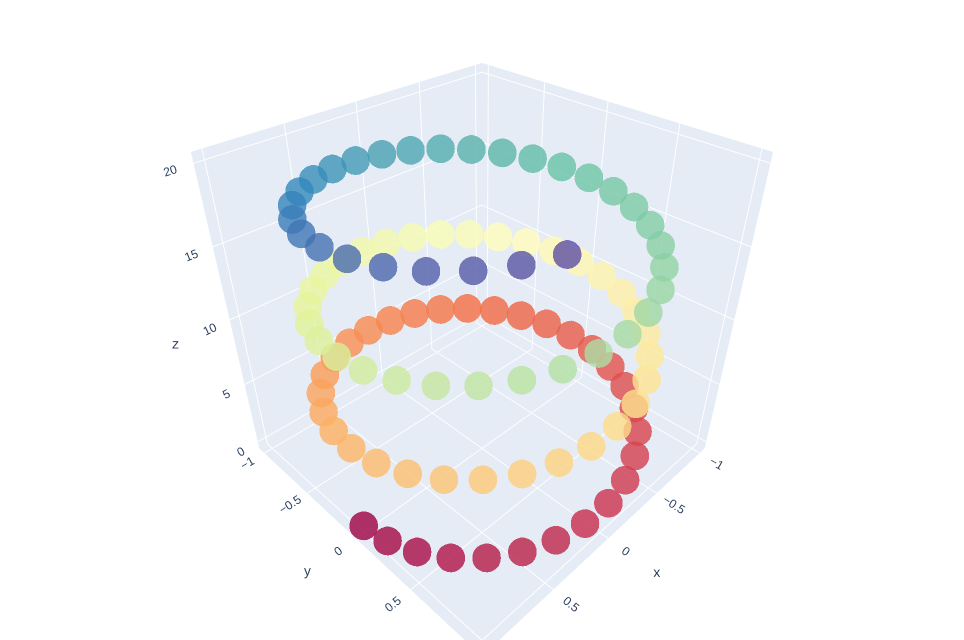

In [2]:
import plotly.graph_objects as go
import plotly.offline as pyo

# Set notebook mode to work in offline
pyo.init_notebook_mode()

import numpy as np

# Helix equation
t = np.linspace(0, 20, 100)
x, y, z = np.cos(t), np.sin(t), t

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode="markers",
            marker=dict(size=12, color=z, colorscale="spectral", opacity=0.8),
        )
    ]
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), width=640, height=640)
fig.show()